# Importing the necessary libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils
from keras.models import model_from_json
from keras import backend as K
K.set_image_data_format('channels_last') 


Using TensorFlow backend.


# Three classes:  Dogs, Panda, Cats

In [3]:
categories = ['dogs', 'panda', 'cats']
path = './animals/'

# Printing Some The Images

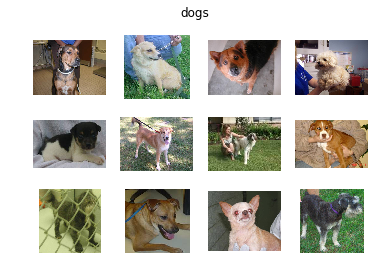

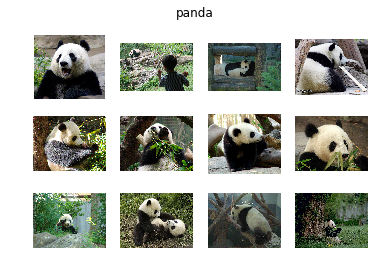

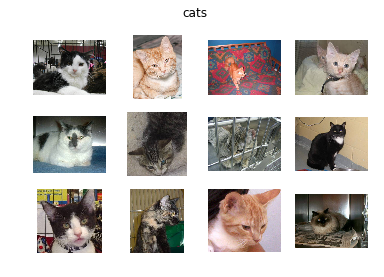

In [4]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

# Data preprocessing 

In [14]:
data = []
labels = []
imagePaths = []
HEIGHT = 150
WIDTH = 150
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)

#resize the images 150x150x3 pixels
for imagePath in imagePaths:
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    label = imagePath[1]
    labels.append(label)

# Normalize the data

In [15]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# Split dataset train/test

In [9]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42) 

Data Splited in 80% train data, 20% test data

In [10]:
trainY = np_utils.to_categorical(trainY, 3)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)


(2400, 150, 150, 3)
(600, 150, 150, 3)
(2400, 3)
(600,)


# Building the model

In [11]:
model = Sequential()

model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 149, 149, 32)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)        0         
_______________________________________________________

# Model Train

In [12]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
2400/2400 [==============================] - 42s 17ms/step - loss: 1.2284 - acc: 0.4967
Epoch 2/25
2400/2400 [==============================] - 38s 16ms/step - loss: 0.7747 - acc: 0.6088
Epoch 3/25
2400/2400 [==============================] - 40s 17ms/step - loss: 0.6860 - acc: 0.6550
Epoch 4/25
2400/2400 [==============================] - 39s 16ms/step - loss: 0.6327 - acc: 0.6854
Epoch 5/25
2400/2400 [==============================] - 40s 17ms/step - loss: 0.5755 - acc: 0.7200
Epoch 6/25
2400/2400 [==============================] - 40s 17ms/step - loss: 0.5194 - acc: 0.7583
Epoch 7/25
2400/2400 [==============================] - 40s 16ms/step - loss: 0.4526 - acc: 0.7821
Epoch 8/25
2400/2400 [==============================] - 39s 16ms/step - loss: 0.3970 - acc: 0.8283
Epoch 9/25
2400/2400 [==============================] - 40s 17ms/step - loss: 0.3364 - acc: 0.8533
Epoch 10/25
2400/2400 [==============================] - 40s 17ms/step - loss: 0.2855 - acc: 0.8850
Epoch 11/

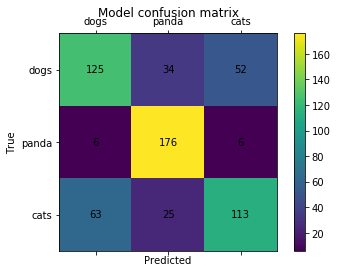

Accuracy : 69.00%


In [13]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

Test Accuracy is 69.00%

# Saving the model in model.h5 file 

In [14]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Loading the model

In [12]:
# load json and create model

#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)

# load weights into new model

#loaded_model.load_weights("model.h5")
#print("Loaded model from disk")

# Classification with pretrained VGG16 with ImageNet dataset

Loading weight of VGG16 model

In [15]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model_VGG16 = VGG16(weights='imagenet', include_top=False)

# Getting the features from VGG16

In [16]:
train_features = model_VGG16.predict(trainX)
test_features = model_VGG16.predict(testX)

In [17]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [18]:
print(train_features.shape)
print(test_features.shape)
print(numFeatures)

(2400, 4, 4, 512)
(600, 4, 4, 512)
8192


# Training a new classifier with the train_features extracted from the pretrained VGG16

In [19]:
model2 = Sequential()


model2.add(Flatten(input_shape = (x,y,z)))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(3, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 1,049,091
Trainable params: 1,049,091
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
model2.fit(train_features, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
2400/2400 [==============================] - 1s 576us/step - loss: 0.7136 - acc: 0.7171
Epoch 2/25
2400/2400 [==============================] - 1s 395us/step - loss: 0.3664 - acc: 0.8617
Epoch 3/25
2400/2400 [==============================] - 1s 398us/step - loss: 0.2939 - acc: 0.8850
Epoch 4/25
2400/2400 [==============================] - 1s 331us/step - loss: 0.2296 - acc: 0.9133
Epoch 5/25
2400/2400 [==============================] - 1s 364us/step - loss: 0.2065 - acc: 0.9221
Epoch 6/25
2400/2400 [==============================] - 1s 375us/step - loss: 0.1690 - acc: 0.9396
Epoch 7/25
2400/2400 [==============================] - 1s 367us/step - loss: 0.1467 - acc: 0.9450
Epoch 8/25
2400/2400 [==============================] - 1s 370us/step - loss: 0.1372 - acc: 0.9475
Epoch 9/25
2400/2400 [==============================] - 1s 377us/step - loss: 0.1241 - acc: 0.9533
Epoch 10/25
2400/2400 [==============================] - 1s 368us/step - loss: 0.1048 - acc: 0.9613
Epoch 11/

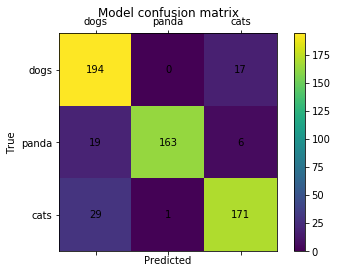

Accuracy : 88.00%


In [21]:
pred = model2.predict(test_features)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

The test accuracy is impoved significantly with the pre-trained VGG16